In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import scipy.io.wavfile
import torch
from fastai.vision import *
from fastai.metrics import error_rate

import IPython.display as ipd
from tqdm import tqdm_notebook

a

In [9]:
pat = re.compile(r'.*/(Female|Male)_[\w\d]+\.jpg')


In [10]:
from pathlib import Path
import numpy as np

path_img = "mel"
fnames = list(Path(path_img).rglob('*.jpg')) + list(Path(path_img).rglob('*.jpeg')) + list(Path(path_img).rglob('*.png'))
np.random.seed(42)
np.random.shuffle(fnames)
fnames[:5]


[Path('mel/Male_28540861_mel_spectrogram.jpg'),
 Path('mel/Male_Dat_bvi_01_2_mel_spectrogram.jpg'),
 Path('mel/Male_Nam_GEEN_04_2_mel_spectrogram.jpg'),
 Path('mel/Female_25261229_mel_spectrogram.jpg'),
 Path('mel/Male_34956768_mel_spectrogram.jpg')]

In [11]:
female_count = 0
male_count = 0

for fname in fnames:
    label = fname.stem.split('_')[0]
    if label == 'Female':
        female_count += 1
    elif label == 'Male':
        male_count += 1

print(f"Female count: {female_count}")
print(f"Male count: {male_count}")

Female count: 1923
Male count: 1743


['Female', 'Male']


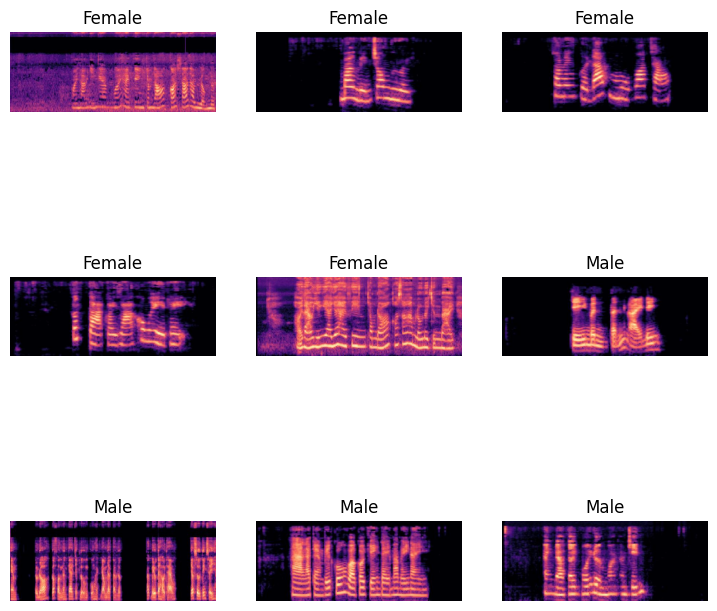

In [12]:
from fastai.vision.all import *
# Tạo DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=RegexLabeller(pat)
)

# Tạo DataLoaders
dls = dblock.dataloaders(path_img, bs=64)


# Hiển thị batch và classes
dls.show_batch()
print(dls.vocab)



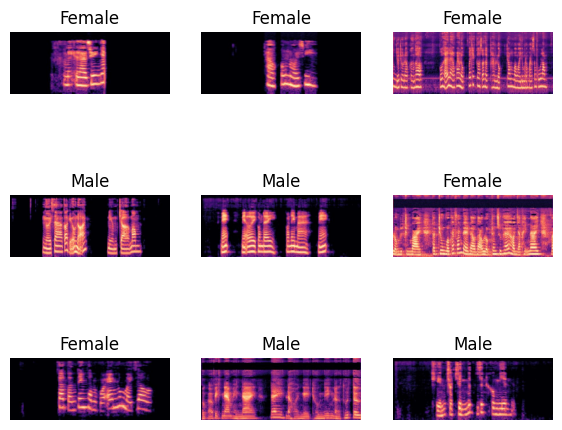

In [13]:
# Replace the old show_batch code with the following
dls.show_batch(nrows=3, ncols=3, figsize=(7,6))


In [14]:
print(dls.vocab)
print(len(dls.vocab), dls.c)


['Female', 'Male']
2 2


In [15]:
learn = cnn_learner(dls, models.resnet34, metrics=error_rate)

In [16]:
torch.cuda.is_available()

False

SuggestedLRs(valley=0.0012022644514217973)

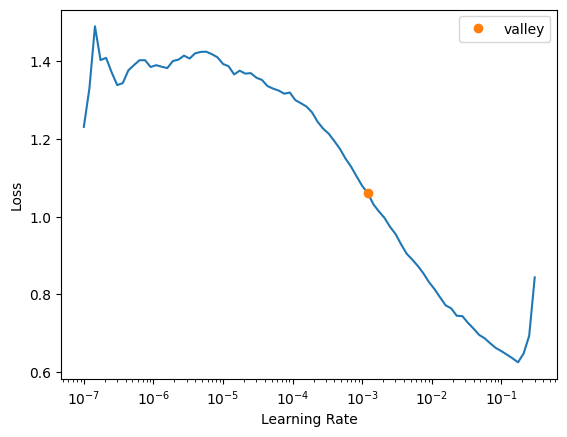

In [17]:
learn.lr_find()

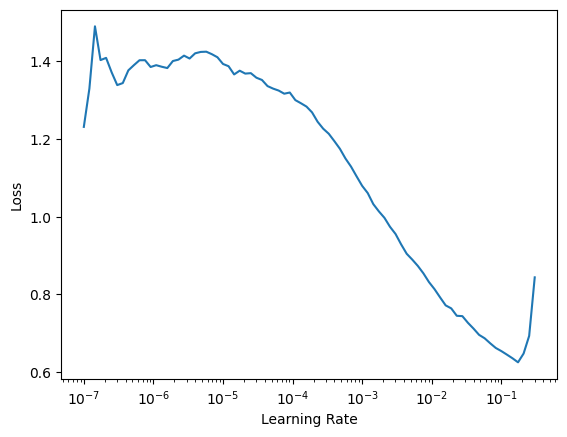

In [18]:
# Plot the learning rate finder graph
learn.recorder.plot_lr_find()

In [19]:
learn.fit_one_cycle(2, 2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.324031,0.081545,0.031378,15:44
1,0.131807,0.043354,0.016371,16:35


In [20]:
learn.export('mel_step1.pkl')

In [21]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.067732,0.048431,0.015007,16:42


In [24]:
learn.export('mel_step2.pkl')